In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import xgboost as xgb

###XG Boosting Method

In [3]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [4]:
import lightgbm as lgb

In [5]:
import xgboost as xgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('/Users/youziya/Downloads/creditcard.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df['Class'].unique()

array([0, 1])

In [11]:
y = df['Class']
X = df.drop('Class', axis=1)

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols)])

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

In [21]:
# Parameters for XGBoost
param = {'max_depth': 3, 'eta': 0.01, 'objective': 'reg:squarederror'}

/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	eval-rmse:0.04117	train-rmse:0.04126
[1]	eval-rmse:0.04091	train-rmse:0.04098
[2]	eval-rmse:0.04065	train-rmse:0.04070
[3]	eval-rmse:0.04039	train-rmse:0.04043
[4]	eval-rmse:0.04013	train-rmse:0.04016
[5]	eval-rmse:0.03988	train-rmse:0.03989
[6]	eval-rmse:0.03963	train-rmse:0.03963
[7]	eval-rmse:0.03938	train-rmse:0.03936
[8]	eval-rmse:0.03914	train-rmse:0.03911
[9]	eval-rmse:0.03889	train-rmse:0.03885
[10]	eval-rmse:0.03866	train-rmse:0.03860
[11]	eval-rmse:0.03842	train-rmse:0.03836
[12]	eval-rmse:0.03818	train-rmse:0.03811
[13]	eval-rmse:0.03795	train-rmse:0.03787
[14]	eval-rmse:0.03773	train-rmse:0.03764
[15]	eval-rmse:0.03749	train-rmse:0.03740
[16]	eval-rmse:0.03728	train-rmse:0.03717
[17]	eval-rmse:0.03705	train-rmse:0.03694
[18]	eval-rmse:0.03684	train-rmse:0.03672
[19]	eval-rmse:0.03662	train-rmse:0.03650
[20]	eval-rmse:0.03641	train-rmse:0.03628
[21]	eval-rmse:0.03620	train-rmse:0.03606
[22]	eval-rmse:0.03599	train-rmse:0.03585
[23]	eval-rmse:0.03579	train-rmse:0.03564
[2

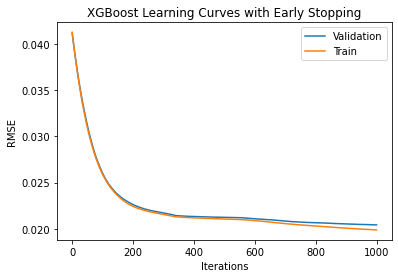

In [22]:
# Train the model with early stopping
num_round = 1000
evallist = [(dvalid, 'eval'), (dtrain, 'train')]
evals_result = {}  # Initialize an empty dictionary to store results
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=10, evals_result=evals_result)

# Plotting the learning curves
epochs = len(evals_result['eval']['rmse'])
x_axis = range(0, epochs)
plt.figure()
plt.plot(x_axis, evals_result['eval']['rmse'], label='Validation')
plt.plot(x_axis, evals_result['train']['rmse'], label='Train')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Iterations')
plt.title('XGBoost Learning Curves with Early Stopping')
plt.show()


In [23]:
evals_result.keys()

dict_keys(['eval', 'train'])

In [24]:
results_df = pd.DataFrame([evals_result['eval']['rmse'],evals_result['train']['rmse']]).T

In [25]:
results_df['diff'] = results_df[0] - results_df[1]

In [26]:
results_df[results_df['diff'] < 0.01]

,0,1,diff
0,0.041174,0.041263,-0.000089
1,0.040908,0.040981,-0.000072
2,0.040646,0.040702,-0.000056
3,0.040388,0.040428,-0.000040
4,0.040133,0.040157,-0.000023
...,...,...,...
995,0.020425,0.019888,0.000538
996,0.020425,0.019886,0.000539
997,0.020425,0.019885,0.000541
998,0.020425,0.019884,0.000542


In [34]:
bst.best_ntree_limit = 67

In [35]:
predictions = bst.predict(dvalid)

In [36]:
predictions

array([9.05801475e-01, 6.72157184e-05, 1.00984114e-04, ...,
       1.55542410e-04, 1.00984114e-04, 1.69268154e-04], dtype=float32)

In [37]:
best_iteration = bst.best_iteration
print(f"Best iteration: {best_iteration}")

Best iteration: 999


###LIGHTGBM

In [14]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

In [15]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1
}


In [16]:
# Train the model
bst = lgb.train(params, train_data)

: 

: 

In [ ]:
# Predict on the validation set
y_pred = bst.predict(X_valid, num_iteration=bst.best_iteration)

# Calculate RMSE (Root Mean Squared Error)
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"RMSE on validation set: {rmse:.2f}")

In [ ]:
pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train and evaluate a model
clf = RandomForestClassifier()
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)